<a href="https://colab.research.google.com/github/JhonasVoc/Comportamento_compras/blob/main/Comportamento_compras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conhecendo a base de dados

Guia de informações:
* Customer ID:The unique identifier for each customer.
* Name: The customer's name.
* Surname: The customer's last name.
* Gender:The gender of the customer.
* Birthdate: The customer's date of birth.
* Transaction Amount:The amount of the transaction. ($)
* Date: The date of the transaction.
* Merchant Name:The name of the merchant where the transaction was made.
* Category: The category of the transaction.

Objetivo: Analisar a base de dados disponível no Kaggle com o propósito de desvendar o padrão de registros de compras ao longo do ano de 2023, compreendendo aspectos como frequência, proporção, média de gastos e a variação desses dados conforme agrupamentos e segmentações são aplicados.

link: https://www.kaggle.com/datasets/bkcoban/customer-transactions

In [ ]:
from datetime import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from zipfile import ZipFile

In [ ]:
with ZipFile('/content/drive/MyDrive/Comportamento_compras/archive (5).zip','r') as zip1:
    zip1.extractall('/content/drive/MyDrive/Comportamento_compras')


FileNotFoundError: ignored

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Comportamento_compras/sample_dataset.csv')
df.head()

,Customer ID,Name,Surname,Gender,Birthdate,Transaction Amount,Date,Merchant Name,Category
0,752858,Sean,Rodriguez,F,2002-10-20,35.47,2023-04-03,Smith-Russell,Cosmetic
1,26381,Michelle,Phelps,NaN,1985-10-24,2552.72,2023-07-17,"Peck, Spence and Young",Travel
2,305449,Jacob,Williams,M,1981-10-25,115.97,2023-09-20,Steele Inc,Clothing
3,988259,Nathan,Snyder,M,1977-10-26,11.31,2023-01-11,"Wilson, Wilson and Russell",Cosmetic
4,764762,Crystal,Knapp,F,1951-11-02,62.21,2023-06-13,Palmer-Hinton,Electronics


# Caracteristícas gerais e transformações

In [ ]:
df.shape

(50000, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer ID         50000 non-null  int64  
 1   Name                50000 non-null  object 
 2   Surname             50000 non-null  object 
 3   Gender              44953 non-null  object 
 4   Birthdate           50000 non-null  object 
 5   Transaction Amount  50000 non-null  float64
 6   Date                50000 non-null  object 
 7   Merchant Name       50000 non-null  object 
 8   Category            50000 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 3.4+ MB


<font color = blues> É possivel notar que as colunas 'Birthdate' e 'Date' estão como objects, para facilitar as analises posteriores \
vamos converte para date


In [ ]:
# Convertendo 'Birthdate' para datetime
df['Birthdate'] = pd.to_datetime(df['Birthdate'])

# Convertendo 'Date' para datetime
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.info() # conferindo tipo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Customer ID         50000 non-null  int64         
 1   Name                50000 non-null  object        
 2   Surname             50000 non-null  object        
 3   Gender              44953 non-null  object        
 4   Birthdate           50000 non-null  datetime64[ns]
 5   Transaction Amount  50000 non-null  float64       
 6   Date                50000 non-null  datetime64[ns]
 7   Merchant Name       50000 non-null  object        
 8   Category            50000 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(5)
memory usage: 3.4+ MB


In [ ]:
df.head() #conferindo o df

,Customer ID,Name,Surname,Gender,Birthdate,Transaction Amount,Date,Merchant Name,Category
0,752858,Sean,Rodriguez,F,2002-10-20,35.47,2023-04-03,Smith-Russell,Cosmetic
1,26381,Michelle,Phelps,NaN,1985-10-24,2552.72,2023-07-17,"Peck, Spence and Young",Travel
2,305449,Jacob,Williams,M,1981-10-25,115.97,2023-09-20,Steele Inc,Clothing
3,988259,Nathan,Snyder,M,1977-10-26,11.31,2023-01-11,"Wilson, Wilson and Russell",Cosmetic
4,764762,Crystal,Knapp,F,1951-11-02,62.21,2023-06-13,Palmer-Hinton,Electronics


# Análise qualitativa


<font color = blue> Vamos analisar a frequência e percetual de cada variável qualitativa dos nossos dados.


## Análise qualitativa gênero

In [ ]:
df.Gender.unique()

array(['F', nan, 'M'], dtype=object)

In [ ]:
df.Gender.value_counts()


F    22713
M    22240
Name: Gender, dtype: int64

In [ ]:
df.Gender.value_counts(normalize = True)

F    0.505261
M    0.494739
Name: Gender, dtype: float64

In [ ]:
percentual = df['Gender'].value_counts(normalize = True) * 100
frequencia = df['Gender'].value_counts()

In [ ]:
dist_frequencia_Gender = pd.DataFrame({'Frequência':frequencia,'Porcentagem':percentual})
dist_frequencia_Gender

,Frequência,Porcentagem
F,22713,50.526105
M,22240,49.473895


In [ ]:
dist_frequencia_Gender.rename(index ={'M':'Masculino','F' :'Feminino'},inplace = True)
dist_frequencia_Gender

,Frequência,Porcentagem
Feminino,22713,50.526105
Masculino,22240,49.473895


In [ ]:
dist_frequencia_Gender.rename_axis('Sexo',axis ='columns',inplace = True)
dist_frequencia_Gender

Sexo,Frequência,Porcentagem
Feminino,22713,50.526105
Masculino,22240,49.473895


## Análise qualitativa Categoria

In [ ]:
df.Category.unique()

array(['Cosmetic', 'Travel', 'Clothing', 'Electronics', 'Restaurant',
       'Market'], dtype=object)

In [ ]:
df.Category.value_counts()

Restaurant     8413
Market         8382
Travel         8377
Electronics    8324
Clothing       8261
Cosmetic       8243
Name: Category, dtype: int64

In [ ]:
df.Category.value_counts(normalize = True)

Restaurant     0.16826
Market         0.16764
Travel         0.16754
Electronics    0.16648
Clothing       0.16522
Cosmetic       0.16486
Name: Category, dtype: float64

In [ ]:
percentual2 = df.Category.value_counts(normalize = True) * 100
frequencia2 = df.Category.value_counts()

In [ ]:
dist_frequencia_Category = pd.DataFrame({'Frequência':frequencia2,'Porcentagem':percentual2})
dist_frequencia_Category

,Frequência,Porcentagem
Restaurant,8413,16.826
Market,8382,16.764
Travel,8377,16.754
Electronics,8324,16.648
Clothing,8261,16.522
Cosmetic,8243,16.486


In [ ]:
dist_frequencia_Category.rename_axis('Categoria',axis = 'columns', inplace = True)

In [ ]:
dist_frequencia_Category

Categoria,Frequência,Porcentagem
Restaurant,8413,16.826
Market,8382,16.764
Travel,8377,16.754
Electronics,8324,16.648
Clothing,8261,16.522
Cosmetic,8243,16.486


## Análise Qualitativa dos Comerciantes

In [ ]:
df['Merchant Name'].unique()

array(['Smith-Russell', 'Peck, Spence and Young', 'Steele Inc', ...,
       'Cantrell, Haynes and Ballard', 'Wilson, Jackson and Beard',
       'Combs LLC'], dtype=object)

In [ ]:
df['Merchant Name'].value_counts()

Smith Ltd                     69
Smith Group                   65
Smith PLC                     65
Smith Inc                     60
Smith LLC                     60
                              ..
Lam, May and Lucas             1
Chan-Johnson                   1
Yang-Rodgers                   1
Richmond, Watson and Smith     1
Combs LLC                      1
Name: Merchant Name, Length: 36939, dtype: int64

In [ ]:
df['Merchant Name'].value_counts(normalize = True)

Smith Ltd                     0.00138
Smith Group                   0.00130
Smith PLC                     0.00130
Smith Inc                     0.00120
Smith LLC                     0.00120
                               ...   
Lam, May and Lucas            0.00002
Chan-Johnson                  0.00002
Yang-Rodgers                  0.00002
Richmond, Watson and Smith    0.00002
Combs LLC                     0.00002
Name: Merchant Name, Length: 36939, dtype: float64

In [ ]:
percentual3 = df['Merchant Name'].value_counts(normalize = True)*100
frequencia3 = df['Merchant Name'].value_counts()

In [ ]:
dist_frequencia_comerciantes = pd.DataFrame({'Frequência ':frequencia3,'Porcentagem':percentual3})

In [ ]:
dist_frequencia_comerciantes.head(5)

,Frequência,Porcentagem
Smith Ltd,69,0.138
Smith Group,65,0.130
Smith PLC,65,0.130
Smith Inc,60,0.120
Smith LLC,60,0.120


In [ ]:
dist_frequencia_comerciantes.rename_axis('Comerciante',axis ='columns', inplace = True)
dist_frequencia_comerciantes.head(5)

Comerciante,Frequência,Porcentagem
Smith Ltd,69,0.138
Smith Group,65,0.130
Smith PLC,65,0.130
Smith Inc,60,0.120
Smith LLC,60,0.120


## Conclusões análises quantitativas


<font color = blue>A distribuiição das variáveis são notavelmente próxima a uniformidade, uma vez que a distribuição de home e mulheres é bem próxima a 50% em ambos os sexo.Além disso, as categorias também apresentam um distribuição bem igualitaria, em que todas as categorias ficam próximas a 16%.
Por outro lado, no caso dos comerciantes, vemos que nenhum grupo ou comerciante em questão apresenta um significancia em termos de frêquencia, reforçando um movimento de compras bem espalhadas.
- A frequência de compras entre as categorias expressa um comprotamento bem semelhante em termos de volume, sendo que não há diferença significativa entre elas.
- A frequência de comprar em relação aos comerciantes também não apresenta nenhum tipo de concentração, uma vez que os comerciantes que mais tem participação no volume de compras não passa de 0.138% cada um.



# Análises de quantidade por transação

In [ ]:
df.head()

,Customer ID,Name,Surname,Gender,Birthdate,Transaction Amount,Date,Merchant Name,Category
0,752858,Sean,Rodriguez,F,2002-10-20,35.47,2023-04-03,Smith-Russell,Cosmetic
1,26381,Michelle,Phelps,NaN,1985-10-24,2552.72,2023-07-17,"Peck, Spence and Young",Travel
2,305449,Jacob,Williams,M,1981-10-25,115.97,2023-09-20,Steele Inc,Clothing
3,988259,Nathan,Snyder,M,1977-10-26,11.31,2023-01-11,"Wilson, Wilson and Russell",Cosmetic
4,764762,Crystal,Knapp,F,1951-11-02,62.21,2023-06-13,Palmer-Hinton,Electronics


In [ ]:
media_geral = round(df['Transaction Amount'].mean(),2)
media_geral

442.12

In [ ]:
#renda media por sexo
media_por_sexo = round(df.groupby('Gender')['Transaction Amount'].mean(),2)
media_por_sexo

Gender
F    445.52
M    440.42
Name: Transaction Amount, dtype: float64

## Media geral e por sexo

In [ ]:
#criando dataframe para comaprar as medias
data = pd.DataFrame({'Gender': ['Geral', 'Feminino', 'Masculino'],
                     'Transaction Amount Mean': [media_geral] + media_por_sexo.tolist()})
data.sort_values('Transaction Amount Mean')

,Gender,Transaction Amount Mean
2,Masculino,440.42
0,Geral,442.12
1,Feminino,445.52


## Media de valor nas compras por comerciante

In [ ]:
media_por_comerciante1 = df.groupby('Merchant Name')['Transaction Amount'].mean()
media_das_medias = media_por_comerciante1.mean()
media_das_medias

441.6481402513283

In [ ]:
#media_por_comerciante
media_por_comerciante = round(df.groupby('Merchant Name')['Transaction Amount'].mean(),2).reset_index()
media_por_comerciante.columns = ['Merchant Name', 'Average Transaction Amount']
media_por_comerciante

,Merchant Name,Average Transaction Amount
0,Abbott Group,1082.74
1,Abbott LLC,699.87
2,Abbott and Sons,210.67
3,"Abbott, Crawford and Richardson",45.79
4,"Abbott, Harris and Ford",95.93
...,...,...
36934,Zuniga-Martinez,65.03
36935,Zuniga-Payne,372.16
36936,Zuniga-Rodriguez,175.86
36937,Zuniga-Stein,21.65


<Axes: xlabel='Average Transaction Amount', ylabel='Merchant Name'>

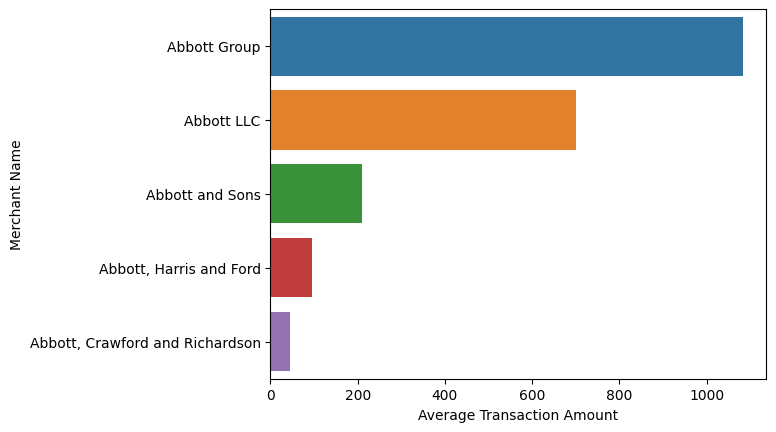

In [ ]:
sns.barplot(media_por_comerciante.head(5).sort_values('Average Transaction Amount',ascending = False),x='Average Transaction Amount',y = 'Merchant Name')

## Média de de valor nas compras por categoria

In [ ]:
#media_por_categoria
media_por_categoria = round(df.groupby('Category')['Transaction Amount'].mean(),2).reset_index().sort_values('Transaction Amount',ascending = False)
media_por_categoria.columns = ['Category', 'Average Transaction Amount']
media_por_categoria

,Category,Average Transaction Amount
5,Travel,1539.96
2,Electronics,527.88
3,Market,256.64
0,Clothing,159.71
1,Cosmetic,106.35
4,Restaurant,55.21


In [ ]:
media_das_medias2 = media_por_categoria.mean()
media_das_medias2

<ipython-input-38-14939d732818>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  media_das_medias2 = media_por_categoria.mean()


Average Transaction Amount    440.958333
dtype: float64

<Axes: xlabel='Average Transaction Amount', ylabel='Category'>

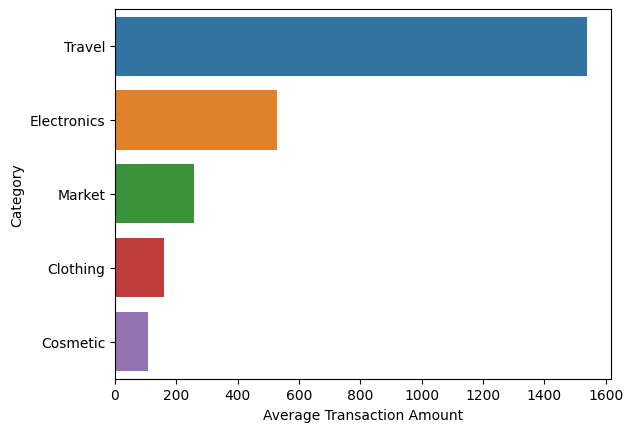

In [ ]:
sns.barplot(media_por_categoria.head(5).sort_values('Average Transaction Amount',ascending = False),x='Average Transaction Amount',y = 'Category')

# Volume de compras mensal

In [ ]:
#numero medio de compras e media de preço por ano
# top 5
df['Date'].min()

Timestamp('2023-01-01 00:00:00')

In [ ]:
df['Date'].max()

Timestamp('2023-10-14 00:00:00')

<font color = blue> A base de dados só possui dados de compra relacionado ao ano de 2023.




In [ ]:
#Extraindo mês da coluna 'Date'
df['Month']= df['Date'].dt.month

In [ ]:
contagem_por_mes = df['Month'].value_counts()

In [ ]:
# Ordenar os resultados por mês (opcional)
contagem_por_mes = contagem_por_mes.sort_index()

In [ ]:
contagem_por_mes

1     5444
2     4854
3     5456
4     5091
5     5493
6     5258
7     5458
8     5399
9     5153
10    2394
Name: Month, dtype: int64

In [ ]:
# Mapear os números de mês para nomes de mês
meses_por_extenso = {
    1: 'Janeiro',
    2: 'Fevereiro',
    3: 'Março',
    4: 'Abril',
    5: 'Maio',
    6: 'Junho',
    7: 'Julho',
    8: 'Agosto',
    9: 'Setembro',
    10: 'Outubro',
    11: 'Novembro',
    12: 'Dezembro'
}

# Renomear os índices usando o dicionário
contagem_por_mes = contagem_por_mes.rename(meses_por_extenso)

# Ordenar os resultados por mês (opcional)
contagem_por_mes = contagem_por_mes.sort_index()

In [ ]:
contagem_por_mes

Abril        5091
Agosto       5399
Fevereiro    4854
Janeiro      5444
Julho        5458
Junho        5258
Maio         5493
Março        5456
Outubro      2394
Setembro     5153
Name: Month, dtype: int64

In [ ]:
meses_em_ordem = [
    'Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho',
    'Julho', 'Agosto', 'Setembro'
]
contagem_por_mes = contagem_por_mes.reindex(meses_em_ordem)

In [ ]:
contagem_por_mes
media_volume_por_mes = contagem_por_mes.mean()

In [ ]:
# Escolhemos não iincluir Outrubro por o mês ainda não havia fechado

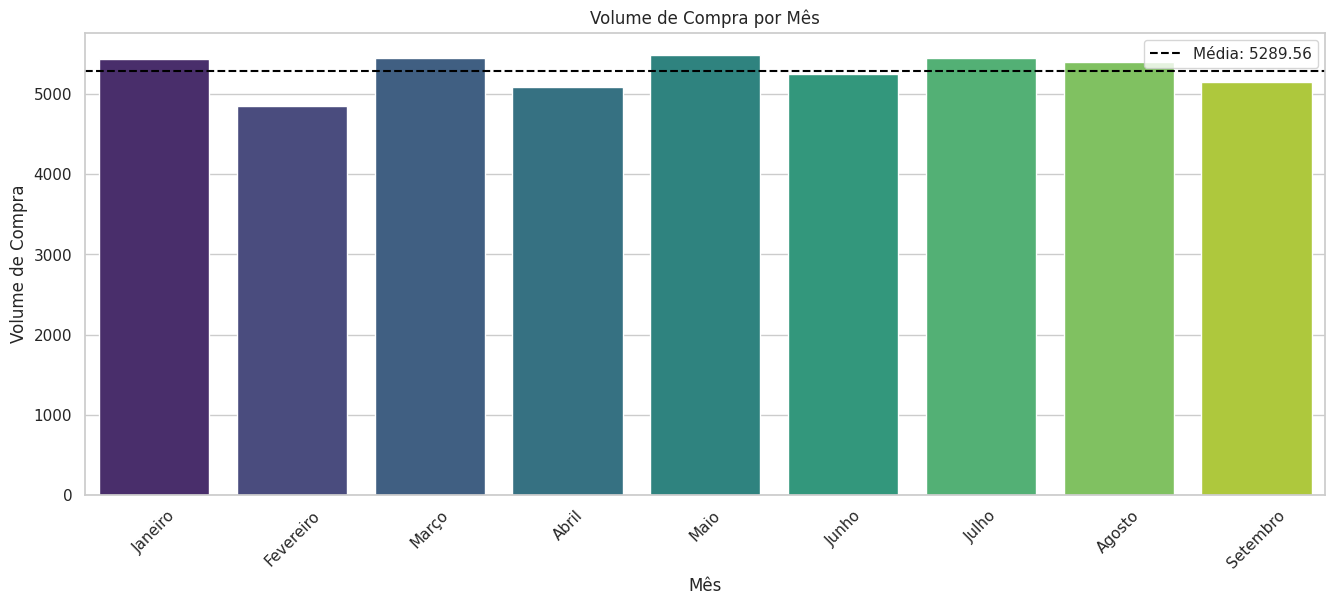

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 6))
sns.barplot(x=contagem_por_mes.index, y=contagem_por_mes.values, palette="viridis")
plt.axhline(y=media_volume_por_mes, color='black', linestyle='--', label=f'Média: {media_volume_por_mes:.2f}') # adcionando a media de compras por mes
plt.legend()
plt.title('Volume de Compra por Mês')
plt.xlabel('Mês')
plt.ylabel('Volume de Compra')
plt.xticks(rotation=45)
plt.show()

## Conclusão de Análise de média de transações e volumes mensais

- A media de valores nas transações de compras entre homens e mulheres não apresentam um diferença siginifcativa que possa refletir em um comportamento de consumo.
- A media de quantidade monetária entre os comerciantes apresenta dados interessantes, em que a media de transações nos coméricos Abbott Group é de 1082.74, Abbot LLC 699.87 e Abbot and sons 210. 67, uma vez que a medas das media de transações por comericante é de 441.64, sendo assim, apenas o Abbott Group e Abbot LLC estão acima da média.
- Na análise das médias por categoria, as Catergoria 'Travel' com 1539.96 e 'Eletronics' com  527.88 estão acima da media por categoria de 440.95.
- O volume de compras mensair no ano de 2023 expressa um comportamento suavizado, em que não há meses com volumes significativamente maiores ou menores.

# Segmentação de clientes

## definindo a faixa de segmentação

In [ ]:
df['Gender'].fillna('Desconhecido', inplace=True)

In [ ]:
current_year = datetime.now().year
df['Age'] = current_year - df['Birthdate'].dt.year
df['Faixa'] = ''

In [ ]:
def faixa_por_idade(age):
    if age < 18:
        return 'Menor de idade'
    elif age <29:
        return 'Jovem adulto'
    elif age < 65:
        return 'Adulto'
    else:
        return 'Idoso'


In [ ]:
# Aplicando na nossa coluna Faixa
df['Faixa'] = df['Age'].apply(faixa_por_idade)

In [ ]:
df.head()

,Customer ID,Name,Surname,Gender,Birthdate,Transaction Amount,Date,Merchant Name,Category,Month,Age,Faixa
0,752858,Sean,Rodriguez,F,2002-10-20,35.47,2023-04-03,Smith-Russell,Cosmetic,4,21,Jovem adulto
1,26381,Michelle,Phelps,Desconhecido,1985-10-24,2552.72,2023-07-17,"Peck, Spence and Young",Travel,7,38,Adulto
2,305449,Jacob,Williams,M,1981-10-25,115.97,2023-09-20,Steele Inc,Clothing,9,42,Adulto
3,988259,Nathan,Snyder,M,1977-10-26,11.31,2023-01-11,"Wilson, Wilson and Russell",Cosmetic,1,46,Adulto
4,764762,Crystal,Knapp,F,1951-11-02,62.21,2023-06-13,Palmer-Hinton,Electronics,6,72,Idoso


## Percentual de cada faixa e analise

In [ ]:
df.Faixa.unique()

array(['Jovem adulto', 'Adulto', 'Idoso'], dtype=object)

In [ ]:
df.Faixa.value_counts()

Adulto          30743
Jovem adulto     9670
Idoso            9587
Name: Faixa, dtype: int64

In [ ]:
df_faixa_percentual = df.Faixa.value_counts(normalize = True) * 100

In [ ]:
df_faixa_percentual = round(df_faixa_percentual,2)
df_faixa_percentual

Adulto          61.49
Jovem adulto    19.34
Idoso           19.17
Name: Faixa, dtype: float64

In [ ]:
df_faixa_frequencia = df.Faixa.value_counts()


In [ ]:
df_faixa_frequencia

Adulto          30743
Jovem adulto     9670
Idoso            9587
Name: Faixa, dtype: int64

In [ ]:
# Crie um DataFrame para a média de preço de transação por faixa etária
df_media_preco = df.groupby('Faixa')['Transaction Amount'].mean()

In [ ]:
df_media_preco = round(df_media_preco,2)
df_media_preco

Faixa
Adulto          443.12
Idoso           443.77
Jovem adulto    437.30
Name: Transaction Amount, dtype: float64

In [ ]:
df_final = pd.DataFrame({'Frequência':df_faixa_frequencia,'Percentual':df_faixa_percentual,'Media por compra':df_media_preco})
df_final


,Frequência,Percentual,Media por compra
Adulto,30743,61.49,443.12
Idoso,9587,19.17,443.77
Jovem adulto,9670,19.34,437.30


In [ ]:
meses_por_extenso = {
    1: 'Janeiro',
    2: 'Fevereiro',
    3: 'Março',
    4: 'Abril',
    5: 'Maio',
    6: 'Junho',
    7: 'Julho',
    8: 'Agosto',
    9: 'Setembro',
    10: 'Outubro',
    11: 'Novembro',
    12: 'Dezembro'
}

In [ ]:
## Agrupando as faixas e categorias

df_agrupado = df.query('Month != 10').groupby(['Faixa', 'Month','Category']).agg({
    'Transaction Amount': ['sum', 'mean']}).reset_index()

In [ ]:
df_agrupado['Month'] = df_agrupado['Month'].map(meses_por_extenso)

In [ ]:
df_agrupado.columns = ['Faixa Etária', 'Mês' ,'Categoria', 'Valor total  de Compras', 'Média de Valor de Compras']


<ipython-input-116-1ffc064c5794>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Mês', y='Valor total  de Compras', hue='Faixa Etária', data=df_agrupado, ci = None)


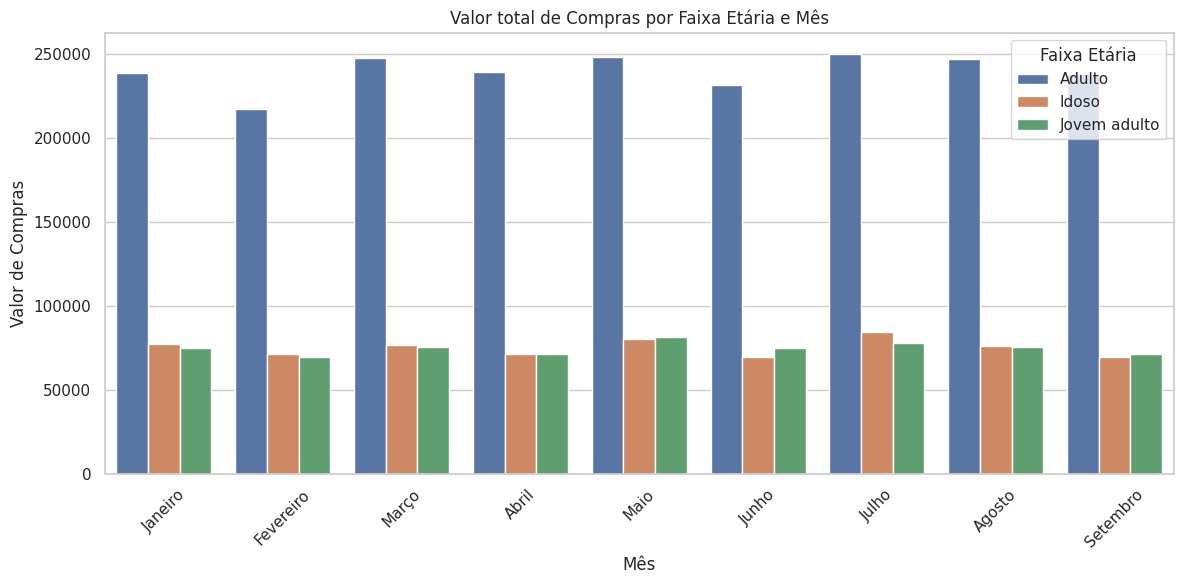

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Mês', y='Valor total  de Compras', hue='Faixa Etária', data=df_agrupado, ci = None)
plt.title('Valor total de Compras por Faixa Etária e Mês')
plt.xlabel('Mês')
plt.ylabel('Valor de Compras')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df_agrupado.head()

,Faixa Etária,Mês,Categoria,Valor total de Compras,Média de Valor de Compras
0,Adulto,Janeiro,Clothing,93498.20,157.139832
1,Adulto,Janeiro,Cosmetic,59424.84,103.527596
2,Adulto,Janeiro,Electronics,287204.74,543.948371
3,Adulto,Janeiro,Market,150465.55,259.871416
4,Adulto,Janeiro,Restaurant,31704.38,57.331609


O comportamento de valor total de compras é interessante para observar a predominância da faixa de adultos em termos de volume e valor total de compras, esse comportamento também pode ter interferencia no número de pessoas que compoe essa faixan, sendo maiores que Idosos e Jovens adultos.

In [ ]:
df_agrupado_mean = df.groupby(['Category', 'Faixa'])['Transaction Amount'].mean().reset_index()
df_agrupado_sum = df.groupby(['Category', 'Faixa'])['Transaction Amount'].sum().reset_index()


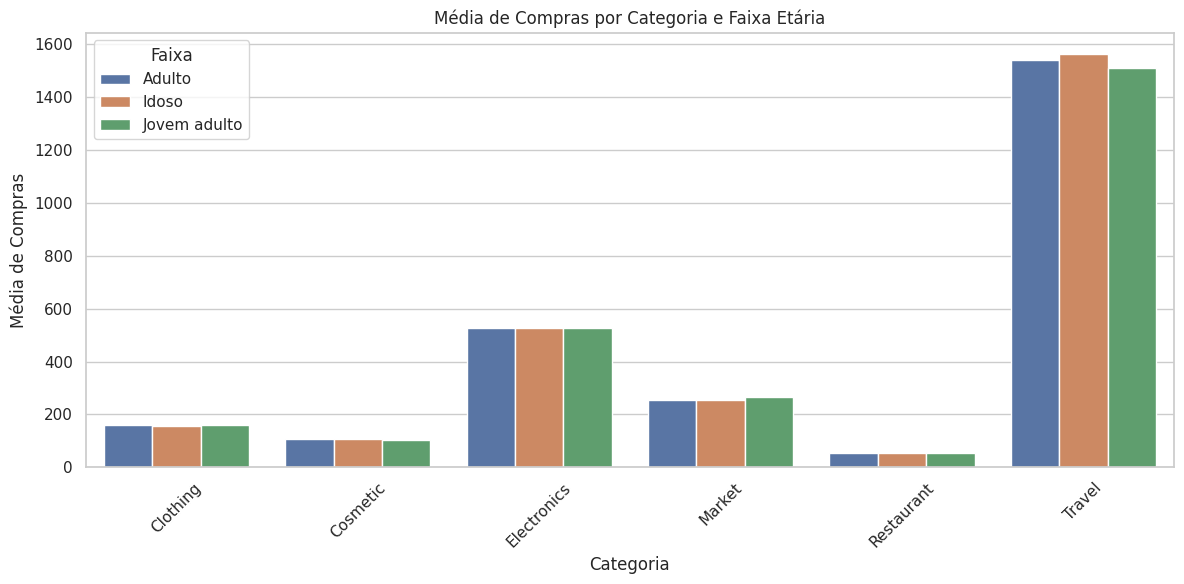

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Transaction Amount', hue='Faixa', data=df_agrupado_mean)
plt.title('Média de Compras por Categoria e Faixa Etária')
plt.xlabel('Categoria')
plt.ylabel('Média de Compras')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

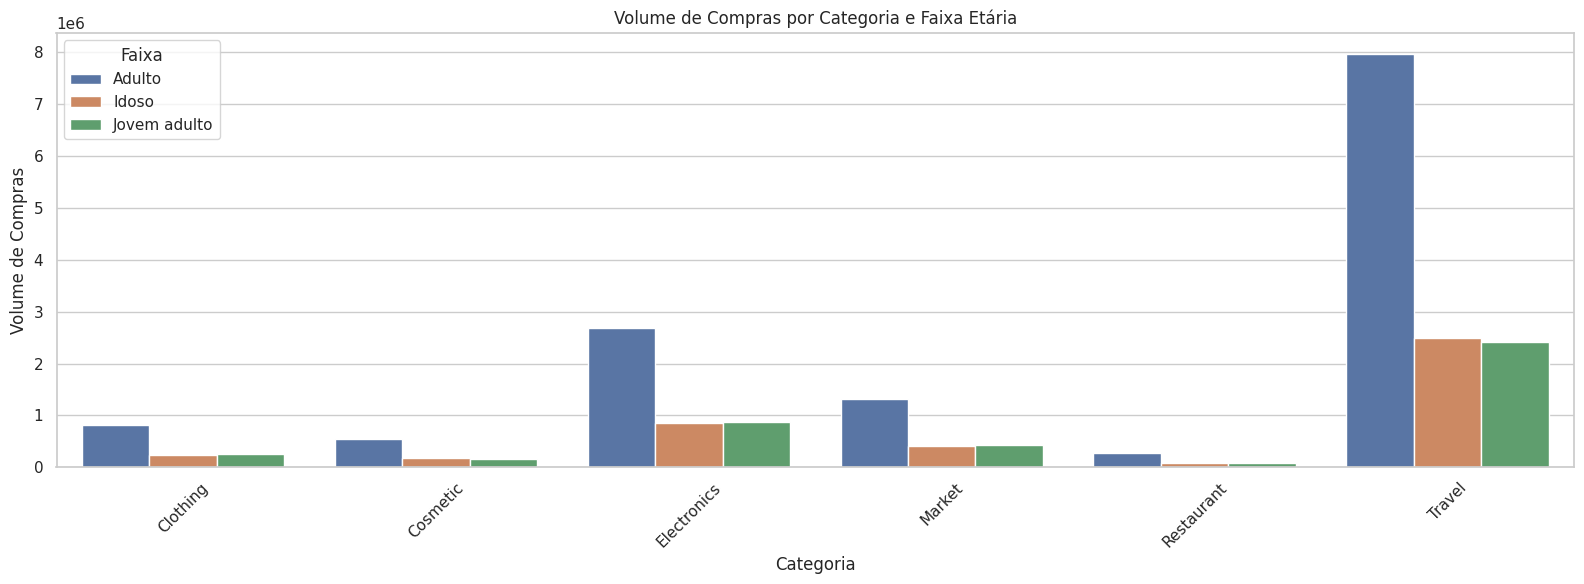

In [ ]:
plt.figure(figsize=(16, 6))
sns.barplot(x='Category', y='Transaction Amount', hue='Faixa', data=df_agrupado_sum)
plt.title('Volume de Compras por Categoria e Faixa Etária')
plt.xlabel('Categoria')
plt.ylabel('Volume de Compras')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

A análise do volume de gastos por faixa etária ao longo dos meses revela a predominância da faixa etária adulta no montante total.
Além disso, a média de gastos por categoria e faixa etária, combinada com o volume de gastos por categoria e faixa etária, reforça a estabilidade no padrão de consumo. Isso significa que os adultos têm um consumo mais alto em todas as categorias, mantendo essa tendência ao longo do tempo.
Identificar categorias que sejam mais consumidas por segmentos específicos poderia orientar campanhas de marketing ou iniciativas semelhantes de forma mais eficaz.